# pyrsistent - Immutable Data Structures


`pyrsistent` should be used for creating immutable containers.

As an example of using `pyrsistent`, let's implement a graph data structure.

As the first step, we will import `typing`, `attr`, and `pyrsistent`.

`typing` is a module in Python's standard library that allows to write Python with a proper type system and removes a lot of runtime surprises.

`attr` was described in this [notebook](https://mybinder.org/v2/gh/arakhmat/python-functional-programming/master?filepath=notebooks%2Fattr.ipynb) 

In [1]:
# Standard Library Packages
import typing

# Third-Party Packages
import attr
import pyrsistent
import pyrsistent.typing  # It's not imported by default when importing `pyrsystent`, so importing it manually

Next, we are going to define a `Node` class using `attr.s` [class decorator](https://www.python.org/dev/peps/pep-3129/)

In [2]:
ValueType = int

@attr.s(frozen=True, kw_only=True)
class Node:
    value: ValueType = attr.ib()

Let's try storing `Node` instances in an immutable vector object `pyrsistent.pvector`

In [3]:
nodes = pyrsistent.v(Node(value=0), Node(value=1), Node(value=2))

# Check elements
assert len(nodes) == 3
assert nodes[1] == Node(value=1)

# Check equality with a different instance that has the same elements
assert nodes == pyrsistent.v(Node(value=0), Node(value=1), Node(value=2))

# Modify an instance and check for inequality
modified_nodes = nodes.append(Node(value=3))
assert modified_nodes != nodes

# Modify an instance, return it to the original state and check for equality
modified_nodes = nodes.append(Node(value=3)).remove(Node(value=3))
assert modified_nodes == nodes

# Check that an element cannot be modified in-place
try:
    nodes[0] = Node(value=0)
except TypeError as e:
    ...
    
# Check pickle support
import pickle
assert pickle.loads(pickle.dumps(nodes)) == nodes

# Check __repr__
pvector = pyrsistent.pvector
nodes_as_str = "pvector([Node(value=0), Node(value=1), Node(value=2)])"
assert f"{nodes}" == nodes_as_str
assert nodes == eval(nodes_as_str)

# Check __hash__
_ = hash(nodes)

As you can see above, `pyrsistent.pvector` is a serializable and hashable class that supports equality and has proper conversion to and from string out of the box.

It's left as an exercise for the reader to checkout out data structures such as `pyrsistent.pset` and `pyrsistent.pmap`

Next, let's define `Graph` class:

In [4]:
Nodes = pyrsistent.typing.PSet[Node]
Neighbours = pyrsistent.typing.PMap[Node, Nodes]

class Graph(pyrsistent.PClass):
    nodes: Nodes = pyrsistent.field(initial=pyrsistent.pset(), factory=pyrsistent.pset)
    neighbours: Neighbours = pyrsistent.field(initial=pyrsistent.pmap(), factory=pyrsistent.pmap)

Let's try creating a default `Graph`:

In [5]:
empty_graph = Graph()

Let's try creating `Graph` by setting the root to `nodes`:

In [6]:
graph = Graph(nodes=nodes)

Let's see how to modify empty `Graph` into the one initalized with `nodes=nodes`

In [7]:
assert graph == empty_graph.set(nodes=nodes)

Next, let's define `add_node` function and insert a few nodes:

In [8]:
# `*` at the beginning of the function makes it accept keyword-only arguments
def add_node(*, graph: Graph, node: Node) -> Graph:
    nodes = graph.nodes.add(node)
    neighbours = graph.neighbours.set(node, pyrsistent.pset())
    return graph.set(nodes=nodes, neighbours=neighbours)

In [9]:
graph = empty_graph

values = (5, 10, 7, 3, 2, 4, 11, 8)
for value in values:
    graph = add_node(graph=graph, node=Node(value=value))

Next, let's define `add_edge` function and insert a few edges:

In [10]:
def add_edge(*, graph: Graph, node_a: Node, node_b: Node) -> Graph:
    neighbours = graph.neighbours
    neighbours = neighbours.set(node_a, neighbours[node_a].add(node_b))
    neighbours = neighbours.set(node_b, neighbours[node_b].add(node_a))
    return graph.set(neighbours=neighbours)

In [11]:
edge_values = ((5, 10), (5, 7), (7, 3), (7, 2), (7, 4), (11, 4), (8, 10))
for value_a, value_b in edge_values:
    graph = add_edge(graph=graph, node_a=Node(value=value_a), node_b=Node(value=value_b))

Let's visualize `Graph`:

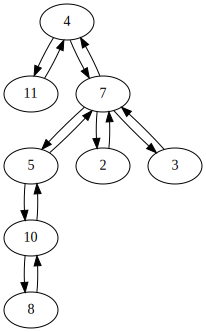

In [12]:
from graphviz import Digraph

def visualize_graph(*, graph: Graph) -> None:
    
    nodes = graph.nodes
    
    dot = Digraph()
    for node in nodes:
        
        node_id = f"{node.value}"
        dot.node(node_id)

        for neighbour in graph.neighbours[node]:
            dot.edge(node_id, f"{neighbour.value}")

    return dot
    
visualize_graph(graph=graph)  

Let's add `history` feature to track every snapshot of the graph (this would not be possible to do as simply with a mutable data structure):

--------------------------------------------------


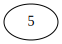

--------------------------------------------------


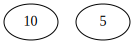

--------------------------------------------------


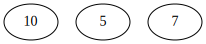

--------------------------------------------------


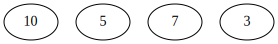

--------------------------------------------------


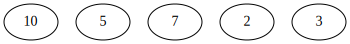

--------------------------------------------------


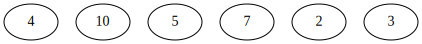

--------------------------------------------------


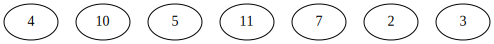

--------------------------------------------------


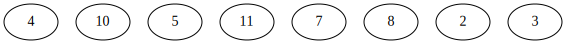

--------------------------------------------------


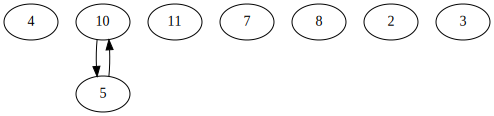

--------------------------------------------------


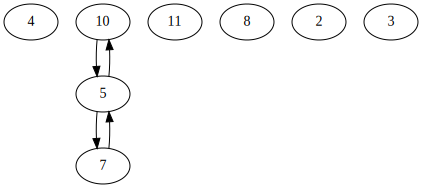

--------------------------------------------------


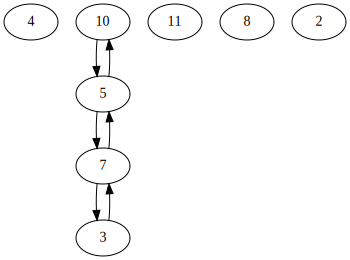

--------------------------------------------------


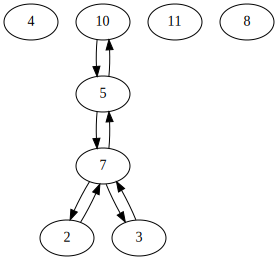

--------------------------------------------------


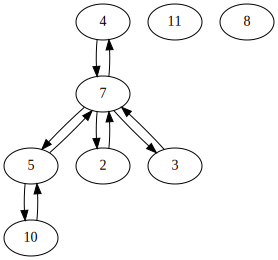

--------------------------------------------------


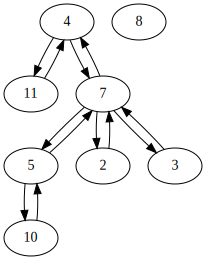

--------------------------------------------------


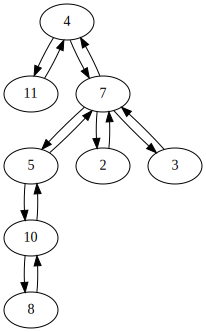

--------------------------------------------------


In [13]:
graph = empty_graph

graph_history = pyrsistent.v(graph)
for value in values:
    graph = add_node(graph=graph, node=Node(value=value))
    graph_history = graph_history.append(graph)
    
for value_a, value_b in edge_values:
    graph = add_edge(graph=graph, node_a=Node(value=value_a), node_b=Node(value=value_b))
    graph_history = graph_history.append(graph)
    
for graph in graph_history:
    display(visualize_graph(graph=graph))
    print('-' * 50)

Checklist after finishing the notebook:
- Become familiar with use cases and usage of `pyrsistent` library
- Be able to create immutable data structures in python and write functional code to modify them